<h1>lgbm baseline</h1>

<h1>DATA LOADING

In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
os.listdir('../../../data')
assert 'out_breed.csv' in os.listdir('../../../data') # this assert breaks if the data is configured uncorrectly

In [4]:
breeds = pd.read_csv('../../../data/out_breed.csv')
colors = pd.read_csv('../../../data/out_color.csv')
states = pd.read_csv('../../../data/out_state.csv')
train  = pd.read_csv('../../../data/out_train.csv')
test   = pd.read_csv('../../../data/out_test.csv')
sub    = pd.read_csv('../../../data/out_submission.csv')

<h1>MODEL</h1>

In [5]:
from lgbmModel import PredictiveModel

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


<h1>EXAMPLE USAGE</h1>

In [7]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [7]:
model = PredictiveModel("example_usage_model")
model.train(X, Y)
predictions = model.predict(X_test)
assert len(predictions)

Wed Mar 20 23:19:47 2019 [example_usage_model.__init__] initialized succesfully


/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


<h1>VALIDATION

In [33]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [34]:
model = PredictiveModel("validation_model_lgbm_baseline")

Thu Mar 21 00:43:32 2019 [validation_model_lgbm_baseline.__init__] initialized succesfully


In [38]:
model.params

{'objective': 'multiclass',
 'verbose': 1,
 'num_class': 5,
 'num_rounds': 50,
 'num_leaves': 100}

In [39]:
model.params['num_leaves'] = 50

In [40]:
model.validation(X, Y, method=2, verbose=True)

Thu Mar 21 00:44:06 2019 [validation_model_lgbm_baseline.validation] start validation method 2
Thu Mar 21 00:44:09 2019 [validation_model_lgbm_baseline.validation] single score = 0.15494638303255082 
Thu Mar 21 00:44:11 2019 [validation_model_lgbm_baseline.validation] single score = 0.14680981917562186 
Thu Mar 21 00:44:13 2019 [validation_model_lgbm_baseline.validation] single score = 0.1722275628780785 
Thu Mar 21 00:44:16 2019 [validation_model_lgbm_baseline.validation] single score = 0.16373630664040262 
Thu Mar 21 00:44:18 2019 [validation_model_lgbm_baseline.validation] single score = 0.1578094386186416 
Thu Mar 21 00:44:18 2019 [validation_model_lgbm_baseline.validation] validation score = 0.15910590206905909 
Thu Mar 21 00:44:18 2019 [validation_model_lgbm_baseline.validation] finished validation method 2


0.15910590206905909

In [10]:
model.validation(X, Y, n_folds=1, verbose=True)

Thu Mar 21 00:31:44 2019 [validation_model_lgbm_baseline.validation] start validation method 1
Thu Mar 21 00:31:47 2019 [validation_model_lgbm_baseline.validation] single score = 0.17288737088955342 
Thu Mar 21 00:31:47 2019 [validation_model_lgbm_baseline.validation] validation score = 0.17288737088955342 
Thu Mar 21 00:31:47 2019 [validation_model_lgbm_baseline.validation] finished validation method 1


0.17288737088955342

printing training results..


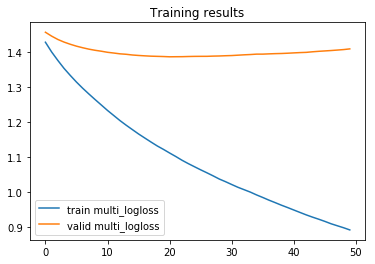

printing feature importance..


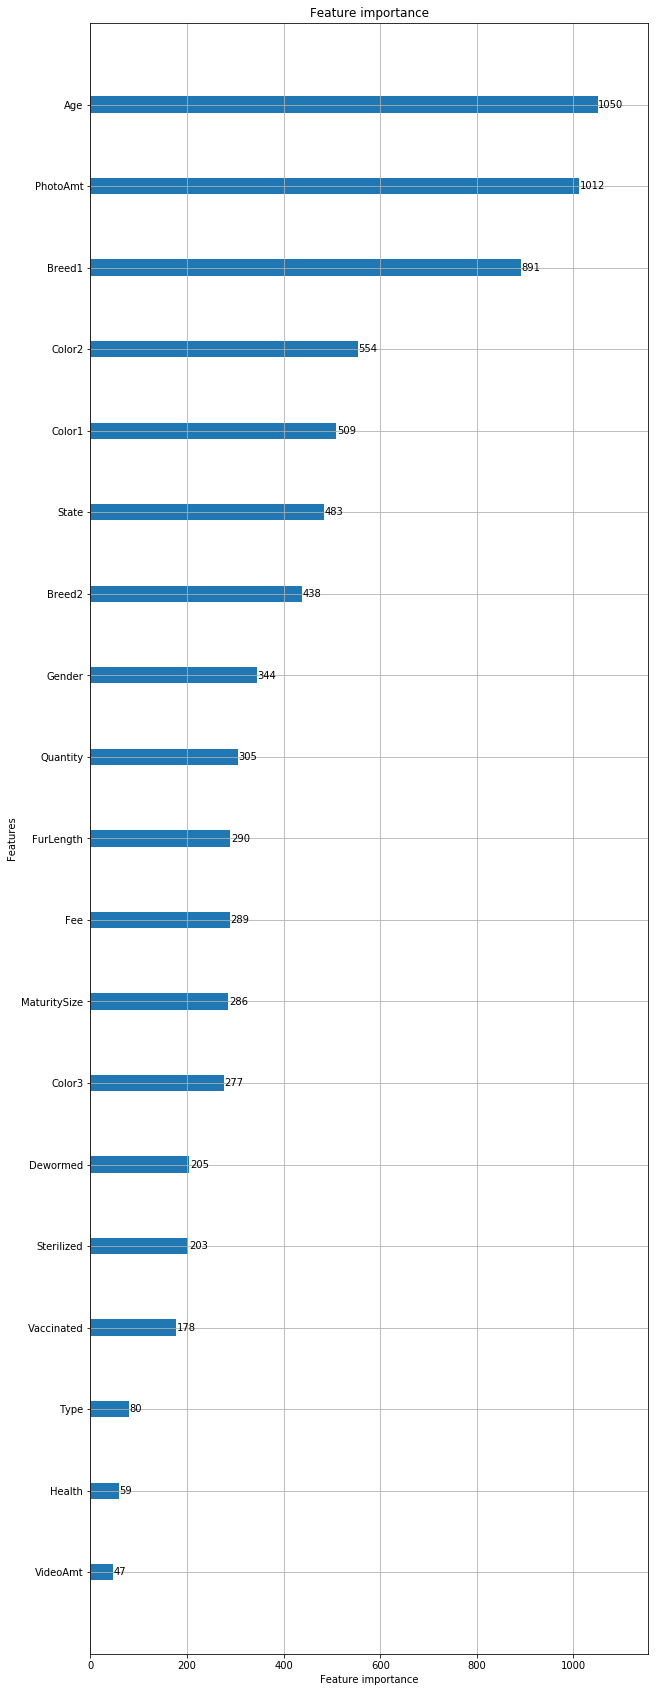

In [11]:
%matplotlib inline
model.visualize()

<h1>Exploration</h1>

In [15]:
dogs = train[train['Type'] == 1].drop('Type',axis=1)
cats = train[train['Type'] == 2].drop('Type',axis=1)

In [27]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = cats.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = cats['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [28]:
X = X.reset_index().drop('index',axis=1)
Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']


In [29]:
model = PredictiveModel("validation_model_lgbm_baseline_dogs")

Thu Mar 21 00:36:28 2019 [validation_model_lgbm_baseline_dogs.__init__] initialized succesfully


In [30]:
model.params

{'objective': 'multiclass', 'verbose': 1, 'num_class': 5, 'num_rounds': 50}

In [31]:
model.validation(X, Y, method=2, verbose=True)

Thu Mar 21 00:36:31 2019 [validation_model_lgbm_baseline_dogs.validation] start validation method 2
Thu Mar 21 00:36:33 2019 [validation_model_lgbm_baseline_dogs.validation] single score = 0.149260030605749 
Thu Mar 21 00:36:36 2019 [validation_model_lgbm_baseline_dogs.validation] single score = 0.13655593059079374 
Thu Mar 21 00:36:39 2019 [validation_model_lgbm_baseline_dogs.validation] single score = 0.09622380423758814 
Thu Mar 21 00:36:42 2019 [validation_model_lgbm_baseline_dogs.validation] single score = 0.09942326279602476 
Thu Mar 21 00:36:44 2019 [validation_model_lgbm_baseline_dogs.validation] single score = 0.14212626799260508 
Thu Mar 21 00:36:44 2019 [validation_model_lgbm_baseline_dogs.validation] validation score = 0.12471785924455214 
Thu Mar 21 00:36:44 2019 [validation_model_lgbm_baseline_dogs.validation] finished validation method 2


0.12471785924455214

DOGS: 0.1749853610297417<br>
CATS: 0.12471785924455214

<h1>How to use catboost library

In [33]:
from catboost import CatBoostClassifier, Pool

In [34]:
len(X)

14993

In [35]:
string_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PetID"]
categorical_col = ["Type","Gender","Vaccinated","Dewormed","Sterilized","Breed1","Breed2","Color1","Color2","Color3","State"]
numerical_col = [col for col in train.columns if col not in string_cols and col not in categorical_col and col != "AdoptionSpeed"]
mapping_sizes = [2, 2, 3, 3, 3, 307, 307, 7, 7, 7, 15]

In [36]:
X = train.drop(string_cols,axis=1)
Y = train['AdoptionSpeed']

In [37]:
X = pd.concat([X[numerical_col], X[categorical_col]], axis=1)

In [38]:
X.iloc[:,len(numerical_col):len(numerical_col)+len(categorical_col)].head(1)

,Type,Gender,Vaccinated,Dewormed,Sterilized,Breed1,Breed2,Color1,Color2,Color3,State
0,2,1,2,2,2,299,0,1,7,0,41326


In [49]:
split = int(len(X)*0.8)

In [50]:
X_train, Y_train = X[:split], Y[:split]
X_val, Y_val = X[split:], Y[split:]

In [39]:
train_dataset = Pool(data=X,
                     label=Y,
                     

In [53]:
model = CatBoostClassifier(
    random_seed=63,
    learning_rate=0.1,
    loss_function='MultiClass'
)

model.fit(
    iterations=500,
    X_train, Y_train,
    eval_set=(X_val, Y_val),
    cat_features=[i for i in range(len(numerical_col), len(numerical_col)+len(categorical_col))],
    logging_level ='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [44]:
model.fit(train_dataset)

0:	learn: -1.6013731	total: 550ms	remaining: 9m 9s
1:	learn: -1.5928440	total: 718ms	remaining: 5m 58s
2:	learn: -1.5857131	total: 845ms	remaining: 4m 40s
3:	learn: -1.5789793	total: 1.09s	remaining: 4m 32s
4:	learn: -1.5719533	total: 1.32s	remaining: 4m 23s
5:	learn: -1.5650762	total: 1.52s	remaining: 4m 12s
6:	learn: -1.5592543	total: 1.93s	remaining: 4m 34s
7:	learn: -1.5531112	total: 2.09s	remaining: 4m 19s
8:	learn: -1.5464223	total: 2.39s	remaining: 4m 23s
9:	learn: -1.5414400	total: 2.59s	remaining: 4m 16s
10:	learn: -1.5361341	total: 2.83s	remaining: 4m 14s
11:	learn: -1.5315458	total: 3.06s	remaining: 4m 12s
12:	learn: -1.5265608	total: 3.29s	remaining: 4m 9s
13:	learn: -1.5216224	total: 3.57s	remaining: 4m 11s
14:	learn: -1.5173041	total: 4.13s	remaining: 4m 31s
15:	learn: -1.5129629	total: 4.82s	remaining: 4m 56s
16:	learn: -1.5093867	total: 4.93s	remaining: 4m 44s
17:	learn: -1.5058918	total: 5.39s	remaining: 4m 54s
18:	learn: -1.5026156	total: 5.55s	remaining: 4m 46s
19:	l

155:	learn: -1.3652111	total: 51.4s	remaining: 4m 37s
156:	learn: -1.3651133	total: 51.6s	remaining: 4m 36s
157:	learn: -1.3649082	total: 51.8s	remaining: 4m 36s
158:	learn: -1.3647080	total: 52.1s	remaining: 4m 35s
159:	learn: -1.3644200	total: 52.7s	remaining: 4m 36s
160:	learn: -1.3642510	total: 53.2s	remaining: 4m 37s
161:	learn: -1.3640332	total: 53.4s	remaining: 4m 36s
162:	learn: -1.3636955	total: 53.8s	remaining: 4m 36s
163:	learn: -1.3636662	total: 54s	remaining: 4m 35s
164:	learn: -1.3634699	total: 54.6s	remaining: 4m 36s
165:	learn: -1.3632933	total: 54.8s	remaining: 4m 35s
166:	learn: -1.3630179	total: 55.4s	remaining: 4m 36s
167:	learn: -1.3628547	total: 55.7s	remaining: 4m 35s
168:	learn: -1.3626084	total: 56.2s	remaining: 4m 36s
169:	learn: -1.3624457	total: 56.6s	remaining: 4m 36s
170:	learn: -1.3623084	total: 56.7s	remaining: 4m 35s
171:	learn: -1.3621114	total: 57.2s	remaining: 4m 35s
172:	learn: -1.3618354	total: 57.6s	remaining: 4m 35s
173:	learn: -1.3616292	total: 

306:	learn: -1.3433536	total: 1m 44s	remaining: 3m 56s
307:	learn: -1.3432663	total: 1m 44s	remaining: 3m 55s
308:	learn: -1.3428766	total: 1m 45s	remaining: 3m 55s
309:	learn: -1.3428415	total: 1m 45s	remaining: 3m 54s
310:	learn: -1.3427791	total: 1m 45s	remaining: 3m 54s
311:	learn: -1.3427394	total: 1m 45s	remaining: 3m 53s
312:	learn: -1.3426619	total: 1m 46s	remaining: 3m 52s
313:	learn: -1.3425294	total: 1m 46s	remaining: 3m 53s
314:	learn: -1.3423833	total: 1m 47s	remaining: 3m 53s
315:	learn: -1.3422395	total: 1m 47s	remaining: 3m 52s
316:	learn: -1.3422075	total: 1m 48s	remaining: 3m 53s
317:	learn: -1.3418890	total: 1m 48s	remaining: 3m 53s
318:	learn: -1.3417953	total: 1m 49s	remaining: 3m 53s
319:	learn: -1.3416245	total: 1m 49s	remaining: 3m 53s
320:	learn: -1.3415509	total: 1m 50s	remaining: 3m 53s
321:	learn: -1.3413945	total: 1m 50s	remaining: 3m 53s
322:	learn: -1.3413550	total: 1m 50s	remaining: 3m 52s
323:	learn: -1.3412708	total: 1m 51s	remaining: 3m 52s
324:	learn

456:	learn: -1.3209273	total: 2m 50s	remaining: 3m 22s
457:	learn: -1.3208913	total: 2m 51s	remaining: 3m 22s
458:	learn: -1.3208265	total: 2m 51s	remaining: 3m 22s
459:	learn: -1.3207300	total: 2m 52s	remaining: 3m 22s
460:	learn: -1.3206985	total: 2m 52s	remaining: 3m 21s
461:	learn: -1.3205022	total: 2m 53s	remaining: 3m 21s
462:	learn: -1.3204625	total: 2m 53s	remaining: 3m 21s
463:	learn: -1.3204255	total: 2m 54s	remaining: 3m 21s
464:	learn: -1.3203059	total: 2m 55s	remaining: 3m 21s
465:	learn: -1.3201208	total: 2m 55s	remaining: 3m 21s
466:	learn: -1.3200685	total: 2m 56s	remaining: 3m 21s
467:	learn: -1.3199642	total: 2m 56s	remaining: 3m 20s
468:	learn: -1.3199330	total: 2m 57s	remaining: 3m 20s
469:	learn: -1.3198458	total: 2m 57s	remaining: 3m 20s
470:	learn: -1.3197554	total: 2m 58s	remaining: 3m 20s
471:	learn: -1.3196621	total: 2m 58s	remaining: 3m 20s
472:	learn: -1.3194574	total: 2m 59s	remaining: 3m 20s
473:	learn: -1.3193357	total: 3m	remaining: 3m 19s
474:	learn: -1

607:	learn: -1.3056589	total: 4m 9s	remaining: 2m 40s
608:	learn: -1.3055971	total: 4m 9s	remaining: 2m 40s
609:	learn: -1.3055128	total: 4m 10s	remaining: 2m 39s
610:	learn: -1.3054490	total: 4m 10s	remaining: 2m 39s
611:	learn: -1.3054009	total: 4m 11s	remaining: 2m 39s
612:	learn: -1.3053622	total: 4m 11s	remaining: 2m 38s
613:	learn: -1.3052166	total: 4m 12s	remaining: 2m 38s
614:	learn: -1.3050287	total: 4m 12s	remaining: 2m 38s
615:	learn: -1.3049340	total: 4m 13s	remaining: 2m 37s
616:	learn: -1.3048492	total: 4m 13s	remaining: 2m 37s
617:	learn: -1.3047245	total: 4m 14s	remaining: 2m 37s
618:	learn: -1.3046593	total: 4m 14s	remaining: 2m 36s
619:	learn: -1.3046256	total: 4m 15s	remaining: 2m 36s
620:	learn: -1.3046022	total: 4m 15s	remaining: 2m 35s
621:	learn: -1.3045532	total: 4m 15s	remaining: 2m 35s
622:	learn: -1.3043525	total: 4m 16s	remaining: 2m 35s
623:	learn: -1.3043361	total: 4m 16s	remaining: 2m 34s
624:	learn: -1.3041672	total: 4m 17s	remaining: 2m 34s
625:	learn: 

758:	learn: -1.2929591	total: 5m 29s	remaining: 1m 44s
759:	learn: -1.2929350	total: 5m 29s	remaining: 1m 44s
760:	learn: -1.2929031	total: 5m 30s	remaining: 1m 43s
761:	learn: -1.2926787	total: 5m 31s	remaining: 1m 43s
762:	learn: -1.2926134	total: 5m 31s	remaining: 1m 42s
763:	learn: -1.2924755	total: 5m 32s	remaining: 1m 42s
764:	learn: -1.2924186	total: 5m 32s	remaining: 1m 42s
765:	learn: -1.2922484	total: 5m 32s	remaining: 1m 41s
766:	learn: -1.2920718	total: 5m 33s	remaining: 1m 41s
767:	learn: -1.2918442	total: 5m 33s	remaining: 1m 40s
768:	learn: -1.2918091	total: 5m 34s	remaining: 1m 40s
769:	learn: -1.2917865	total: 5m 35s	remaining: 1m 40s
770:	learn: -1.2916990	total: 5m 35s	remaining: 1m 39s
771:	learn: -1.2916597	total: 5m 36s	remaining: 1m 39s
772:	learn: -1.2916220	total: 5m 37s	remaining: 1m 39s
773:	learn: -1.2914755	total: 5m 37s	remaining: 1m 38s
774:	learn: -1.2913946	total: 5m 38s	remaining: 1m 38s
775:	learn: -1.2913731	total: 5m 38s	remaining: 1m 37s
776:	learn

909:	learn: -1.2823247	total: 6m 48s	remaining: 40.4s
910:	learn: -1.2821817	total: 6m 49s	remaining: 40s
911:	learn: -1.2820655	total: 6m 49s	remaining: 39.5s
912:	learn: -1.2820493	total: 6m 50s	remaining: 39.1s
913:	learn: -1.2820317	total: 6m 51s	remaining: 38.7s
914:	learn: -1.2819959	total: 6m 51s	remaining: 38.2s
915:	learn: -1.2819788	total: 6m 52s	remaining: 37.8s
916:	learn: -1.2819502	total: 6m 52s	remaining: 37.4s
917:	learn: -1.2818600	total: 6m 53s	remaining: 36.9s
918:	learn: -1.2816680	total: 6m 54s	remaining: 36.5s
919:	learn: -1.2816170	total: 6m 54s	remaining: 36.1s
920:	learn: -1.2815006	total: 6m 55s	remaining: 35.6s
921:	learn: -1.2814493	total: 6m 55s	remaining: 35.2s
922:	learn: -1.2813822	total: 6m 56s	remaining: 34.7s
923:	learn: -1.2813429	total: 6m 56s	remaining: 34.3s
924:	learn: -1.2812391	total: 6m 57s	remaining: 33.8s
925:	learn: -1.2811668	total: 6m 57s	remaining: 33.4s
926:	learn: -1.2810041	total: 6m 57s	remaining: 32.9s
927:	learn: -1.2809504	total: 

<BarContainer object of 19 artists>

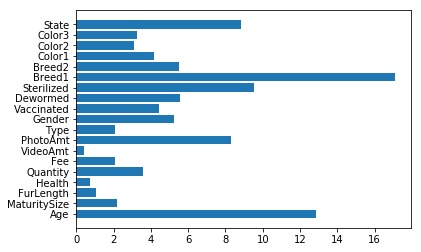

In [58]:
from matplotlib import pyplot as plt
plt.barh(model.feature_names_, model.feature_importances_)